### Fitting data with formula
Gnuplot is capable to fit given data with functions given as formulas. This notebook contain several examples about how to fit data with GnuplotRB.

First lets prepare some data:

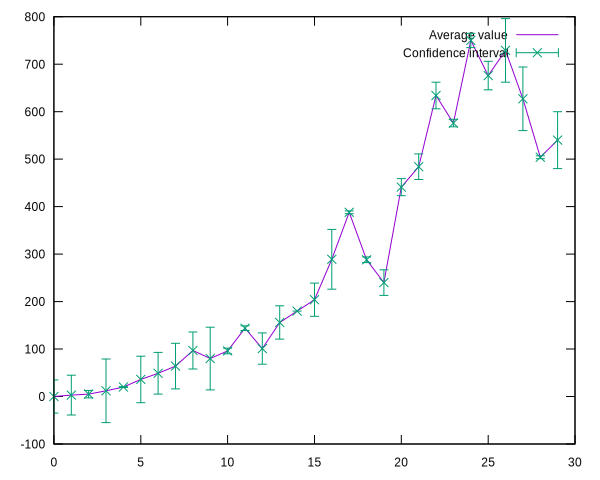

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB

rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70)]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

And now lets try to fit it with some function.

First parameter of #fit is *data* (you can use here Datablock, Dataset or any other object out of which Datablock may be constructed). Special options are *function* and *initials*, other options (such as *using*) may be found in gnuplot docs. Be careful: you should give initial value for each coefficient used in formula.

Return value is the following hash:
```
{
  :formula_ds => #<dataset with formula which fits given data>,
  :coefficients => #<hash of calculated coefficients>,
  :deltas => #<hash of possible deltas for coefficients>,
  :data => #<given data>
}
```

In [2]:
some_poly = fit(df, function: "a*x**3 + b*x + c", initials: {a: 1, b: 1, c: 1})
some_poly[:coefficients]

{:a=>0.00740601, :b=>20.8594, :c=>-68.7408}

In [3]:
some_poly[:formula_ds].data

" 0.00740601*x**3 + 20.8594*x + -68.7408 "

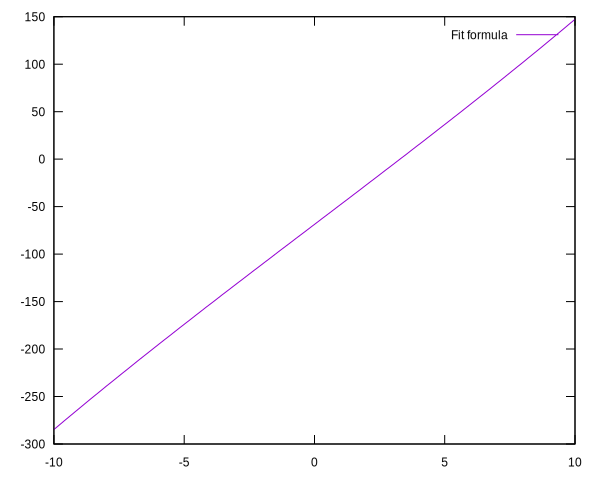

In [4]:
some_poly[:formula_ds]

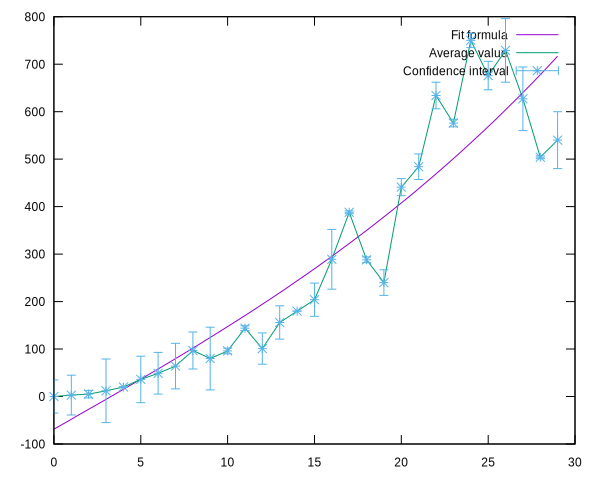

In [5]:
random_points << some_poly[:formula_ds]

You can find more information about how gnuplot's fitting work in [gnuplot doc](http://www.gnuplot.info/docs_5.0/gnuplot.pdf).

#### Default fittings
Polynomial:

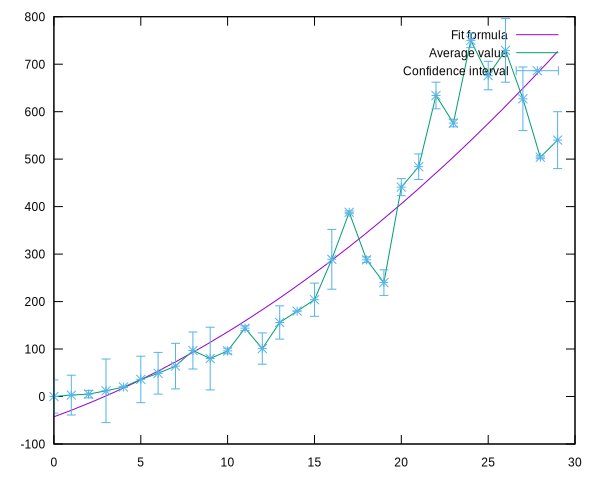

In [6]:
poly = fit_poly(df)
random_points.add_dataset(poly[:formula_ds])

Be default polynomial degree is 2 but you can set it:

In [7]:
frames = (2..9).map { |i| random_points.add_dataset(fit_poly(df, degree: i)[:formula_ds].options(title: "Fit (degree #{i})", lw: 2)) }
Animation.new(*frames, animate: { delay: 150 } )

#<GnuplotRB::Animation:0x00000004228270 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x000000046b2b88 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000046b2d40 @type=:math_function, @data=" -42.6737*x**0 + 13.3391*x**1 + 0.454786*x**2 ", @options=Hamster::Hash[:title => "Fit (degree 2)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000004491f48 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004491e80 @stored_in_file=false, @data="0 0\n1 3\n2 5\n3 12\n4 20\n5 36\n6 49\n7 64\n8 97\n9 80\n10 96\n11 144\n12 101\n13 156\n14 180\n15 204\n16 289\n17 388\n18 288\n19 240\n20 441\n21 484\n22 634\n23 576\n24 750\n25 676\n26 729\n27 627\n28 504\n29 540\n">, @options=Hamster::Hash[:title => "Average value", :with => "lines", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000004497470 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000044972b8 @stored_in_file=false, @data="0 0 35\n1 3 42\n2 5 8\n3 12 67\n4 20 1\n5 36 49\n6 49 44\n7 64 48\n8 97 39\n9 80 66\n10 96 6\n11 144 5\n12 101 33\n13 156 35\n14 180 0\n15 204 35\n16 289 63\n17 388 3\n18 288 6\n19 240 27\n20 441 18\n21 484 27\n22 634 28\n23 576 8\n24 750 15\n25 676 30\n26 729 67\n27 627 67\n28 504 3\n29 540 60\n">, @options=Hamster::Hash[:title => :"Confidence interval", :with => "err", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000004911b68 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000004911d20 @type=:math_function, @data=" 59.6183*x**0 + -32.9545*x**1 + 4.514*x**2 + -0.0933152*x**3 ", @options=Hamster::Hash[:title => "Fit (degree 3)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000004491f48 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004491e80 @stored_in_file=false, @data="0 0\n1 3\n2 5\n3 12\n4 20\n5 36\n6 49\n7 64\n8 97\n9 80\n10 96\n11 144\n12 101\n13 156\n14 180\n15 204\n16 289\n17 388\n18 288\n19 240\n20 441\n21 484\n22 634\n23 576\n24 750\n25 676\n26 729\n27 627\n28 504\n29 540\n">, @options=Hamster::Hash[:title => "Average value", :with => "lines", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000004497470 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000044972b8 @stored_in_file=false, @data="0 0 35\n1 3 42\n2 5 8\n3 12 67\n4 20 1\n5 36 49\n6 49 44\n7 64 48\n8 97 39\n9 80 66\n10 96 6\n11 144 5\n12 101 33\n13 156 35\n14 180 0\n15 204 35\n16 289 63\n17 388 3\n18 288 6\n19 240 27\n20 441 18\n21 484 27\n22 634 28\n23 576 8\n24 750 15\n25 676 30\n26 729 67\n27 627 67\n28 504 3\n29 540 60\n">, @options=Hamster::Hash[:title => :"Confidence interval", :with => "err", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000003568558 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000003568788 @type=:math_function, @data=" -42.5153*x**0 + 50.1823*x**1 + -8.90078*x**2 + 0.634132*x**3 + -0.0125422*x**4 ", @options=Hamster::Hash[:title => "Fit (degree 4)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000004491f48 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004491e80 @stored_in_file=false, @data="0 0\n1 3\n2 5\n3 12\n4 20\n5 36\n6 49\n7 64\n8 97\n9 80\n10 96\n11 144\n12 101\n13 156\n14 180\n15 204\n16 289\n17 388\n18 288\n19 240\n20 441\n21 484\n22 634\n23 576\n24 750\n25 676\n26 729\n27 627\n28 504\n29 540\n">, @options=Hamster::Hash[:title => "Average value", :with => "lines", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000004497470 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000044972b8 @stored_in_file=false, @data="0 0 35\n1 3 42\n2 5 8\n3 12 67\n4 20 1\n5 36 49\n6 49 44\n7 64 48\n8 97 39\n9 80 66\n10 96 6\n11 144 5\n12 101 33\n13 156 35\n14 180 0\n15 204 35\n16 289 63\n17 388 3\n18 288 6\n19 240 27\n20 441 18\n21 484 27\n22 634 28\n23 576 8\n24 750 15\n25 676 30\n26 729 67\n27 627 67\n28 504 3\n29 540 60\n">, @options=Hamster::Hash[:title => :"Confidence interval", :with => "err", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000045c0ea0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000045c1058 @type=:math_functio

You can also fit data with *exp*, *sin* and *log* like this:

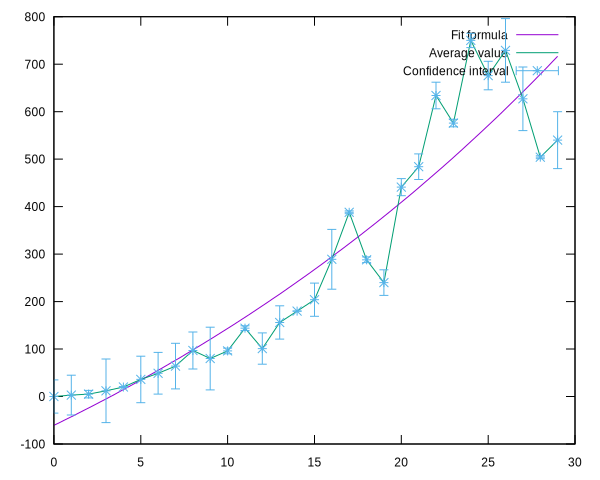

In [8]:
exp = fit_exp(df)
random_points.add_dataset(exp[:formula_ds])